# 2. Exploratory Data Analysis

## 2.1. Import libraries and dataset

In [1]:
library(dplyr)
library(corrplot)
library(car)
library(stargazer)
crime <- read.csv('crime_v2.csv')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'car' was built under R version 3.4.4"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.4.4"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Warning message:
"package 'stargazer' was built under R version 3.4.4"
Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



## 2.2. Data cleaning and univariate analysis

### First stage

The campaign research questions will be assessed using a dataset of crime statistics that contain 91 out of 100 counties in North Carolina. Even though it contains most of the counties in the State, we do not have information on the sampling regime used to select the counties in this dataset and cannot assume that the sample is random. This implies that we cannot  treat our findings as representative of our population of all the counties but only of those contained in the sample. However, the fact that there is data for 90% of counties make our findings relevant for most of the target counties of the political campaign.

A high level assessment of the dataset reveals that all but one (`probability of prison`) of the variables are numerical/integer variables and all of them but have one (again, `probability of prinson`) have 6 blank observations. We need to investigate later if they belong to the same six observations. Other important features to notice are that:

- `year` is useful to provide context to results but it is not relevant since it doesn't contain any variation.
- `probability of arrest` has at least one value larger than 1 that needs to be further investigated.
- `probability of conviction` is a factor when it should be an integer. It has at least one non-numerical value (\`) which is the likely cause of why it was imported as a class factor.
- The values of `density` seem to be unusually low. We need to further investigate the reason for these unusually small values.
- `west` and `central`: it is not clear what the definition of each of this is and if they are exhaustive of all counties and mutually exclusive. This needs to be further validated later.
- `urban`: the definition of urban according to whether the county is categorized as a Standard metropolitan statistical area (SMSA) is ambiguous for our purposes. According to the US Census, a SMSA is "a geographic entity defined by the federal Office of Management and Budget for use by federal statistical agencies". Furthermore, according to the Wikipedia entry of this kind of entity, "such regions are neither legally incorporated as a city or town would be, nor are they legal administrative divisions like counties or separate entities such as states; because of this, the precise definition of any given metropolitan area can vary with the source". Therefore, incorporating this variable into our model would not let give us information about either the relationship that is being modeled or the factors that are being controlled for.
- `mix`: This definition is also ambiguous since it is not clear what face-to-face offences mean and it is also not clear how some of the plausible interpretations of this variable could be of interest to solve our research question.

All the other variables not mentioned above seem to be within reasonable ranges and do not have unusually high concentration of values. In the second stage, we take a closer look at some of these given their importance to answer the campaign's research question.

In [5]:
paste("Number of unique counties:", length(unique(crime$county)))

[1] "Number of unique counties: 91"

In [6]:
paste("Structure of dataset")
str(crime)

[1] "Structure of dataset"

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [7]:
paste("Summary statistics of variables in dataset")
summary(crime)

[1] "Summary statistics of variables in dataset"

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

Upon closer inspection of incomplete cases, we found that indeed the six blank values for all the variables but `prbconv` come from the same six observations. Furthermore, the value '\`' included in `prbconv` comes from one of these observations. In this case, given that these values do not add any information to our dataset and that one of their values is causing `probability of conviction` to be casted with the wrong class, we have decided to remove them from the dataset.

In [11]:
paste("Empty cases:")
options(repr.matrix.max.rows=10,repr.matrix.max.cols=200)
crime[!complete.cases(crime), ]

[1] "Empty cases:"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [12]:
# Remove empty cases
clean <- crime[complete.cases(crime), ]

### Second stage

Following the superficial analysis of the dataset, we proceed to dig deeper into the possible quality issues found and to explore the main features of our variables of interest and control variables. To do this, our approach is to try to identify sources of errors (exploring atypical values, finding unusual concentrations of observations around certain values), and using dispersion measurements and plots to identify particular features in the distribution of these variables that may be useful to better model the relationships of interest to the campaign. 

In this stage, we focused only on the variables that are of interest to the campaign and variables that may be useful controls to include in our regression analysis.

#### Variables of interest

##### County

We found two observations with the same `county` value (county 193). Upon closer inspection, we found that both observations contain the exact same data, then proceeded to remove one of the observations.

In [13]:
# One duplicated county (remove)
paste("Unique county identifier:", nrow(clean) == length(unique(clean$county)))
paste("Duplicated county id:", clean$county[duplicated(clean$county) & !is.na(clean$county)])
subset(clean, subset = clean$county == 193)
clean <- clean[!duplicated(clean$county), ]

[1] "Unique county identifier: FALSE"

[1] "Duplicated county id: 193"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,1,0,0,5.93109,285.8289,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,1,0,0,5.93109,285.8289,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


##### Crime rate

`crime rate` values are within a reasonable range and there are no concentrations around specific values that would lead us to suspect measurement errors. Therefore, it is not necessary to clean this variable up and we will leave it unchanged.

In [14]:
summary(clean$crmrte)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020604 0.030002 0.033510 0.040249 0.098966 

The distribution of `crmrte` is positively skewed. Even though its range is not particularly large (about an order of magnitude), its skewness is also not particularly worrying to grant doing additional transformations and the number of observations (90) allows us to rely on the CLT, it is important to notice that the `log(crmrte)` has a distribution that is closer to normal. Therefore, we will explore including this transformation in follow up analyses.

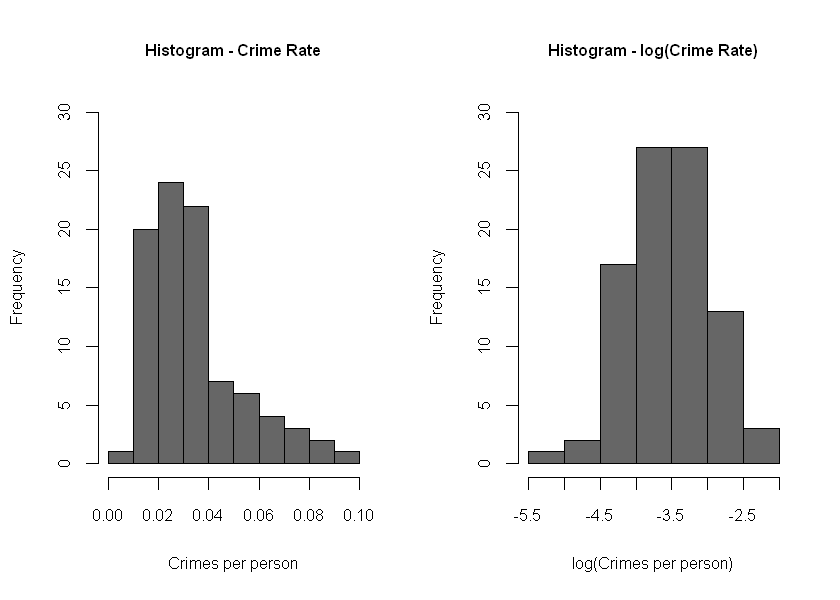

In [15]:
par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
options(repr.plot.width=7, repr.plot.height=5)
hist(clean$crmrte, main = "Histogram - Crime Rate", col = rgb(0.4, 0.4, 0.4, 1), ylim = c(0, 30), xlab = "Crimes per person",
     breaks = sqrt(nrow(clean)))
hist(log(clean$crmrte), main = "Histogram - log(Crime Rate)", col = rgb(0.4, 0.4, 0.4, 1), ylim = c(0, 30), 
     xlab = "log(Crimes per person)", breaks = sqrt(nrow(clean)))

In [16]:
# Check for concentration of values
freqs.crmrte <- data.frame(table(clean$crmrte))
paste("Repeated values:", 
      length(freqs.crmrte$Freq[freqs.crmrte$Freq > 1]))

[1] "Repeated values: 0"

##### Probability of arrest

There is one value higher than 1. This is atypical but we cannot be sure that it is a error since we don't have enough information about how this variable is defined. Specifically, there are possible definitions of this variable or county characteristics under which a value higher than 1 is possible. For example, if `probability of arrest` is defined as,

$$prbarr = \frac{\text{arrests_in_period_t}}{\text{crimes_in_period_t}}$$.

Under this definition, arrests in period t correspond both to crimers committed in period $t$ but also in $t-i$ since there is a lag between the time when a crime is committed and the time when the arrest is made, that could span for more than one period. For example, it is possible that after a period $t-1$ with an unusually high number of crimes followed by a period $t$ with unusually low number of crimes the number of arrests in $t$ is higher than the number of crimes in $t$, since many of the arrests in $t$ may come from the crimes committed in $t-1$.

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,1,0,0,1.28365,204.2206,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495


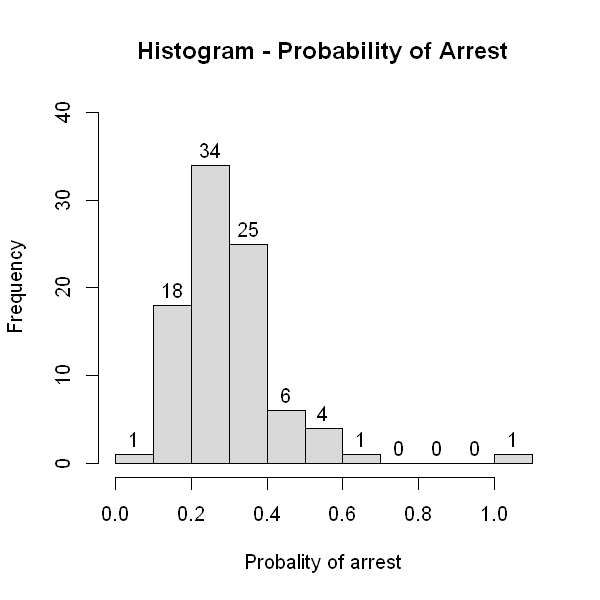

In [18]:
options(repr.plot.width=5, repr.plot.height=5)
hist(clean$prbarr, main = "Histogram - Probability of Arrest", xlab = "Probality of arrest", 
     labels = TRUE, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.3))
clean[clean$prbarr > 1, ]

##### Prbconv

`prbconv` is being imported into R as a factor, when it should be numeric, which is likely caused by the '\`' value. Since we have removed this value already, we can now recast this variable as as numeric.

In [20]:
# Remove ` and cast the column to numeric
clean$prbconv <- as.numeric(as.character(clean$prbconv))

Summarizing this variable, we found that there are 10 observations with values higher than 1 and one of them with a value higher than 2. Despite these values being unusually high they are possible for the same reasons exposed in the case of `prbarr`. Furthermore, in the case of `prbconv` the lag between the arrest and the end of a trial is likely even longer than the lag of `prbarr`. Therefore, since we don't have additional information on the definition used to build this variable and no way to validate which specific definition was used using numerical methods, we will not clean these 10 values.

In [23]:
paste("Summary statistics - Probability of conviction")
summary(clean$prbconv)
paste("Number of observations higher than 1:", length(clean$prbconv[clean$prbconv > 1]))
clean[clean$prbconv > 1, ]

[1] "Summary statistics - Probability of conviction"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34422 0.45170 0.55086 0.58513 2.12121 

[1] "Number of observations higher than 1: 10"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
2,3,87,0.0152532,0.132029,1.48148,0.450000,6.35,0.00074588,1.0463320,26.89208,0,1,0,7.91632,255.1020,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
10,19,87,0.0221567,0.162860,1.22561,0.333333,10.34,0.00202425,0.5767442,61.15251,0,0,0,24.31170,260.1381,613.2261,191.2452,290.5141,266.0934,567.06,403.15,258.33,299.44,0.05334728,0.07713232
44,99,87,0.0171865,0.153846,1.23438,0.556962,14.75,0.00185912,0.5478615,39.57348,1,0,0,14.28460,259.7841,417.2099,168.2692,301.5734,247.6291,258.99,442.76,387.02,291.44,0.01960784,0.12894706
51,115,87,0.0055332,1.090910,1.50000,0.500000,20.70,0.00905433,0.3858093,28.19310,1,0,0,1.28365,204.2206,503.2351,217.4908,342.4658,245.2061,448.42,442.20,340.39,386.12,0.10000000,0.07253495
56,127,87,0.0291496,0.179616,1.35814,0.335616,15.99,0.00158289,1.3388889,32.02376,0,0,0,34.27990,290.9091,426.3901,257.6008,441.1413,305.7612,329.87,508.61,380.30,329.71,0.06305506,0.07400288
61,137,87,0.0126662,0.207143,1.06897,0.322581,6.18,0.00081426,0.3167155,44.29367,0,0,0,33.04480,299.4956,356.1254,170.8711,170.9402,250.8361,192.96,360.84,283.90,321.73,0.06870229,0.07098370
67,149,87,0.0164987,0.271967,1.01538,0.227273,14.62,0.00151871,0.6092437,29.03402,1,0,0,10.00460,223.6136,437.0629,188.7683,353.2182,210.4415,289.43,421.34,342.92,301.23,0.11682243,0.06215772
84,185,87,0.0108703,0.195266,2.12121,0.442857,5.38,0.00122210,0.3887588,40.82454,0,1,0,64.34820,226.8245,331.5650,167.3726,264.4231,2177.0681,247.72,381.33,367.25,300.13,0.04968944,0.07008217
90,195,87,0.0313973,0.201397,1.67052,0.470588,13.02,0.00445923,1.7459893,53.66693,0,0,0,37.43110,315.1641,377.9356,246.0614,411.4330,296.8684,392.27,480.79,303.11,337.28,0.15612382,0.07945071
91,197,87,0.0141928,0.207595,1.18293,0.360825,12.23,0.00118573,0.8898810,25.95258,1,0,0,5.46081,314.1660,341.8803,182.8020,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893


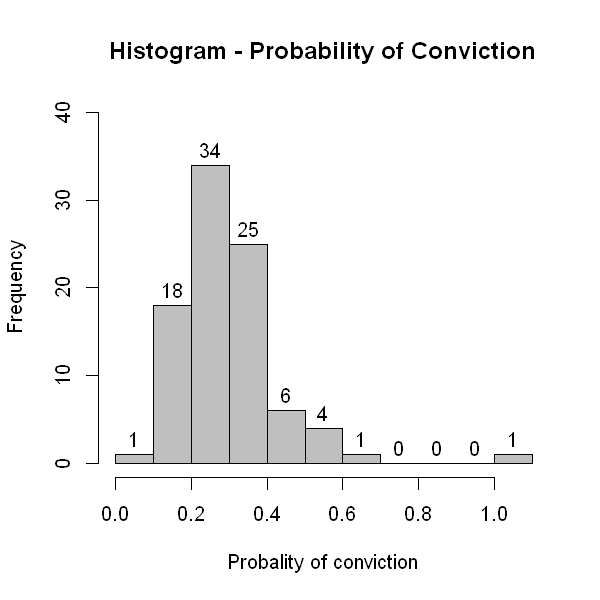

In [22]:
hist(clean$prbarr, main = "Histogram - Probability of Conviction", xlab = "Probality of conviction",
     labels = TRUE, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.5))

##### Probability of prison

Probability of prison spreads over a reasonable range (between 0.15 fand 0.6) and does not seem to have unusually high concentrations around certain values that would lead us to suspect measurement errors. Furthermore, the distribution of this variable is symmetric with particular features that we need to take into account when building our model.

It is interesting to note that, unlike probability of arrest and conviction, this variable does not have unusually large values, which further supports our suspicion that the numerator and denominator of these two variables correspond in part to data from different periods, given the existing lag between the time a crime is commited and an arrest is made, and the lag between an arrest and the end of a trial. In contrast, there is usually a small time lag between the time a conviction is made and the sentence is delivered, where misdemeanor cases are usually sentenced immediately and felony cases in days to weeks.

In [24]:
paste("Summary statistics - Probability of prison")
summary(clean$prbpris)

[1] "Summary statistics - Probability of prison"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1500  0.3642  0.4222  0.4106  0.4576  0.6000 

##### Average sentence

The average sentence ranges between 5.3 and 20.7 days, with a mean of 9.7 days. These are all very small numbers which may indicate that this variable is defined as

$$\frac{1}{\text{Number of convictions}}\sum_{i=1}^n{\text{Number of days of prison}}$$

This means that the average is not taken only over the convictions that led to prison sentences, but over all convictions, including many $0$ values where there should be `NA`s.

This definition is problematic for our purposes for two reasons:

1. `avgsen` may have a high collinearity with `prbpris` because a higher probability of prison will likely be associated with higher average sentences. This will obfuscate the difference between these two variables, which are both of interest to the campaing, and will decrease the efficiency of the estimators, making it harder to assess their statistical significance.
2. One of the questions of interest to the campaign is whether higher sentences will lead to lower crime. Given that the majority of sentences do not result in prison time (the probability of being sentenced is 41% on average), the average sentence will be mainly driven all these 0 values and will not provide useful information on the sentences that result in prison.

However, the guiding documentation does not provide a definition of how this variable is calculated, and we don't have other ways to deduce what definition was used. Therefore, we will assume for the moment that the above is the definition that was used and will not transform this variable, since we didn't find evidence of measurement errors, and its distribution doesn't show skewness, atypical values or unusually high concentrations of observations around certain values.

In [29]:
paste("Average probability of prison:", round(100 * mean(clean$prbpris), 1), "%")

[1] "Average probability of prison: 41.1 %"

In [30]:
paste("Summary statistics - Average sentence")
summary(clean$avgsen)

[1] "Summary statistics - Average sentence"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.380   7.375   9.110   9.689  11.465  20.700 

#### Control variables

##### Tax per capita

`taxpc`'s distribution is particularly atypical because it seems to be truncated at values lower than 25.69, it is positively skewed, its range comprises more than one order of magnitude and it is unusually concentrated at values between 30 and 40.

To further explore the reason for this distribution we focused on the range of observations with values between 30 and 40 but we didn't find particularly high concentrations of observations around certain values that indicate measurement errors in the data. Therefore, we moved to test whether some transformations would yield a better behavior in this variable.

In [ ]:
hist(clean$taxpc[clean$taxpc < 41 & clean$taxpc > 19], main = "Histogram - Tax Per Capita [20, 30]",
    xlab = "Tax per capita", col = 'gray')

After trying different transformation, we found that none of their distribution is particularly different than the original variable. However, `log(taxpc)` shows less concentration of observations, a lower range and might be more meaningful when interpreting the results of our model. Therefore, we will include this transformation in our bivariate analysis.

In [ ]:
summary(clean$taxpc)
par(mfrow = c(1, 3), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
hist(clean$taxpc, breaks = sqrt(nrow(clean)), col="grey", main = "Tax Per Capita", xlab = "Tax per capita", ylim = c(0, 50))
axis(side = 1, at = seq(0, 130, 10))
hist(log(clean$taxpc), col="grey", main = "log(Tax Per Capita)", breaks = sqrt(nrow(clean)), ylim = c(0, 50))
axis(side = 1, at = seq(0, 6, 0.5))
hist(1/clean$taxpc, col="grey", main = "1 / Tax Per Capita", breaks = sqrt(nrow(clean)), ylim = c(0, 50))

##### Regions

The first thing to notice in the regions variables (i.e. `west` and `central`) is the apparent abscence of at least one region (`east`) in the dataset. The fact that some observations have a value $0$ in both `west` and `central` also indicates that there is at least one regional variable missing which could be a potential source of bias because it is likely to capture regional variations that we will be capturing only partially using the two variables available. Even though we could assume that there is indeed only three regions (the Wikipedia entry of this topic contains three regions [source](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#North_Carolina)), we cannot be sure that this is indeed the definition that was used in the dataset.

Furthermore, we found that there is one observation (county 71) with value 1 in both `west` and `central`. It is not clear whether this is evidence of a measurement error or if it means that the definition of these variables overlap with each other. Since we don't have a way to internally validate to which region this county belongs to, or if it can belong to both, we will leave this variable unaltered.

##### Density

As mentioned above, the values of density look unusually low. Given that the density of North Carolina between 1980 and 1990 ranged from 120.9 to 136.4 [(US Census, 2018)](https://www.census.gov/population/www/censusdata/density.html) and that our sample contains 90% of counties, some of which are categorized as urban, a density of less than 1.6 for 75% of observations and a maximum density of 8.8 seems to be unusually low. Even though the guiding documentation does not provide details on the definition of this variable, it could be the case that this variable is scaled; however, we cannot validate this using our dataset and this wouldn't make a difference in our regression model, since the rescaling would not affect the $R^2$ or significance of the estimated coefficient, only it value. Therefore, this variable is still useful given that it may be used as a control and we are not particularly interested in the value of the estimated coefficient.

In [47]:
paste("Summary statistics - density")
summary(clean$density)

[1] "Summary statistics - density"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00002 0.54718 0.97925 1.43567 1.56926 8.82765 

In [59]:
density.freq <- data.frame(table(clean$density))
paste("Values with unusual concentration of observations:", nrow(density.freq[density.freq$Freq > 1, ]))

[1] "Values with unusual concentration of observations: 0"

##### Other variables

Upon inspecting other variables at a high level, we didn't find evidence of errors or other specially relevant features that needed to be taken into account into the model that we will build to answer our research question. The values in these variables were within reasonable ranges, there were no missing values and there were not unusually high concentrations of observations around certain values. Therefore, all the other variables that were not mentioned above were not transformed.

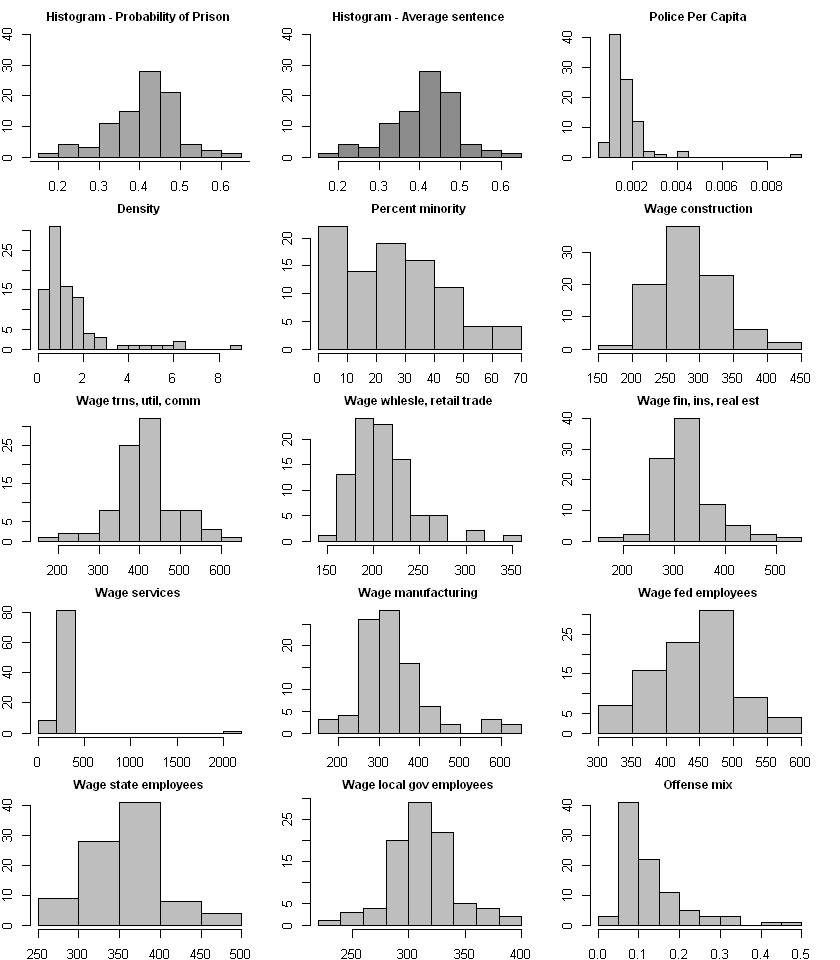

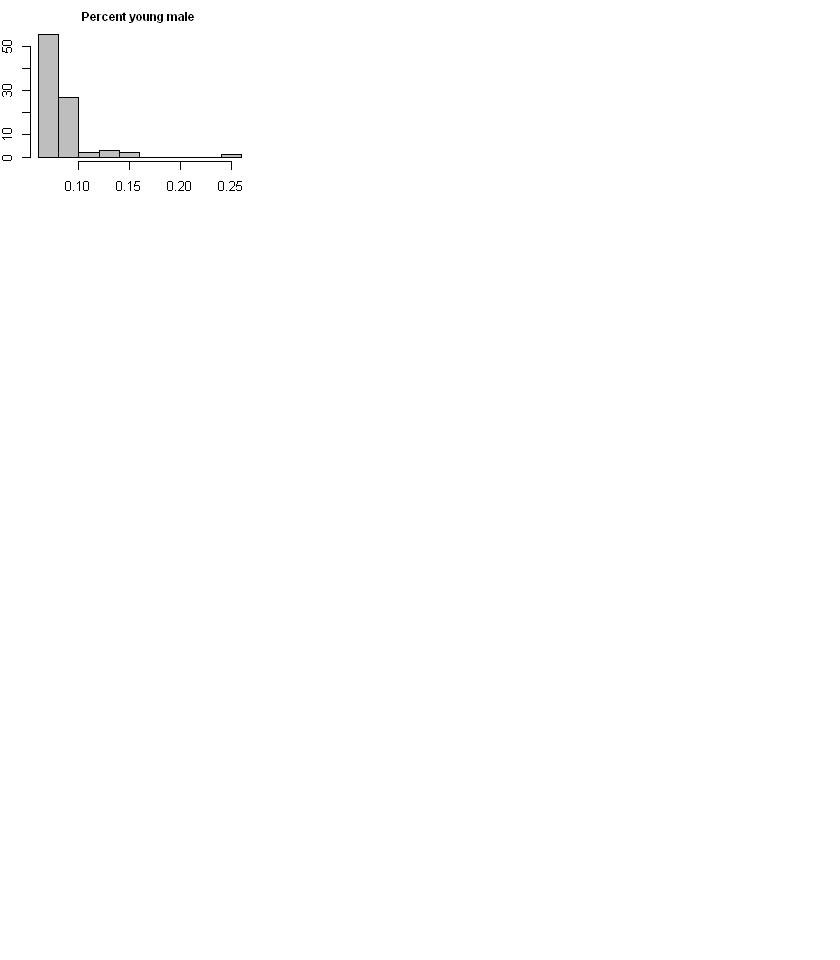

In [42]:
options(repr.plot.width=7, repr.plot.height=8)
par(mfrow = c(5, 3), mar = c(1,1,1,1)+0.9, cex.main = 0.9)
hist(clean$prbpris, main = "Histogram - Probability of Prison", xlab = "Probality of prison", 
     labels = F, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.7))
axis(side = 1, at = seq(0, 1, 0.2))
hist(clean$prbpris, main = "Histogram - Average sentence", xlab = "Average sentence, days", 
     labels = F, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.9))
hist(clean$polpc, breaks="FD", col="grey", main = "Police Per Capita")
hist(clean$density, breaks="FD", col="grey", main = "Density")
hist(clean$pctmin80, col="grey", main = "Percent minority")
hist(clean$wcon, col="grey", main = "Wage construction")
hist(clean$wtuc, col="grey", main = "Wage trns, util, comm")
hist(clean$wtrd, col="grey", main = "Wage whlesle, retail trade")
hist(clean$wfir, col="grey", main = "Wage fin, ins, real est")
hist(clean$wser, col="grey", main = "Wage services")
hist(clean$wmfg, col="grey", main = "Wage manufacturing")
hist(clean$wfed, col="grey", main = "Wage fed employees")
hist(clean$wsta, col="grey", main = "Wage state employees")
hist(clean$wloc, col="grey", main = "Wage local gov employees")
hist(clean$mix, col="grey", main = "Offense mix")
hist(clean$pctymle, col="grey", main = "Percent young male")

## 2.3. Bivariate analysis

Once we have finished exploring the quality of the variables in the dataset, and the main features of the variables that are of interest to the campaign that need to be taken into account for building the model that will help us answering the campaign's research question, we need to start exploring how the variables of interest relate to each other, mainly, how our variables of interest relate to `Crime rate` and to other predictors of `Crime rate` that may improve the model by reducing bias and increasing the efficiency of their estimated coeffcients.

#### Quick import and clean (delete later)

In [75]:
crime <- read.csv('crime_v2.csv')
clean <- crime[complete.cases(crime),]
clean <- clean[!duplicated(clean),]
clean$prbconv <- as.numeric(as.character(clean$prbconv))
clean$log.crmrte <- log(clean$crmrte)
clean$log.taxpc <- log(clean$taxpc)
clean$log.prbarr <- log(clean$prbarr)
clean$log.prbconv <- log(clean$prbconv)
clean$log.prbpris <- log(clean$prbpris)
clean$log.polpc <- log(clean$polpc)

#### Variables of interest

An initial exploration of the relationship between Crime rate and log(Crime rate) and our variables of interest (probability of arrest, probability of conviction, probability of prison and average sentence) indicates a relationship that is similar for both crime rate and its logarithmic form. Specifically, there seems to be a negative relationship with probbaibility of arrest and probability of conviction but not a clear relationship with probability of conviction or average sentence). Furthermore, there doesn't seem to be a strong indication of multicollinearity between the regressors, except for proability of arrest and average sentence.

Following this initial exploration, we will proceed to further investigate the relationships hinted at by the scatteplot matrix, using correlation analysis to quantify their strength.

In [63]:
vars.interest <- c("crmrte", "log.crmrte", "prbarr", "log.prbarr",
                   "prbconv", "log.prbconv", "prbpris", "log.prbpris")

[1] "Scatterplot matrix of variables of interest and Crime rate"

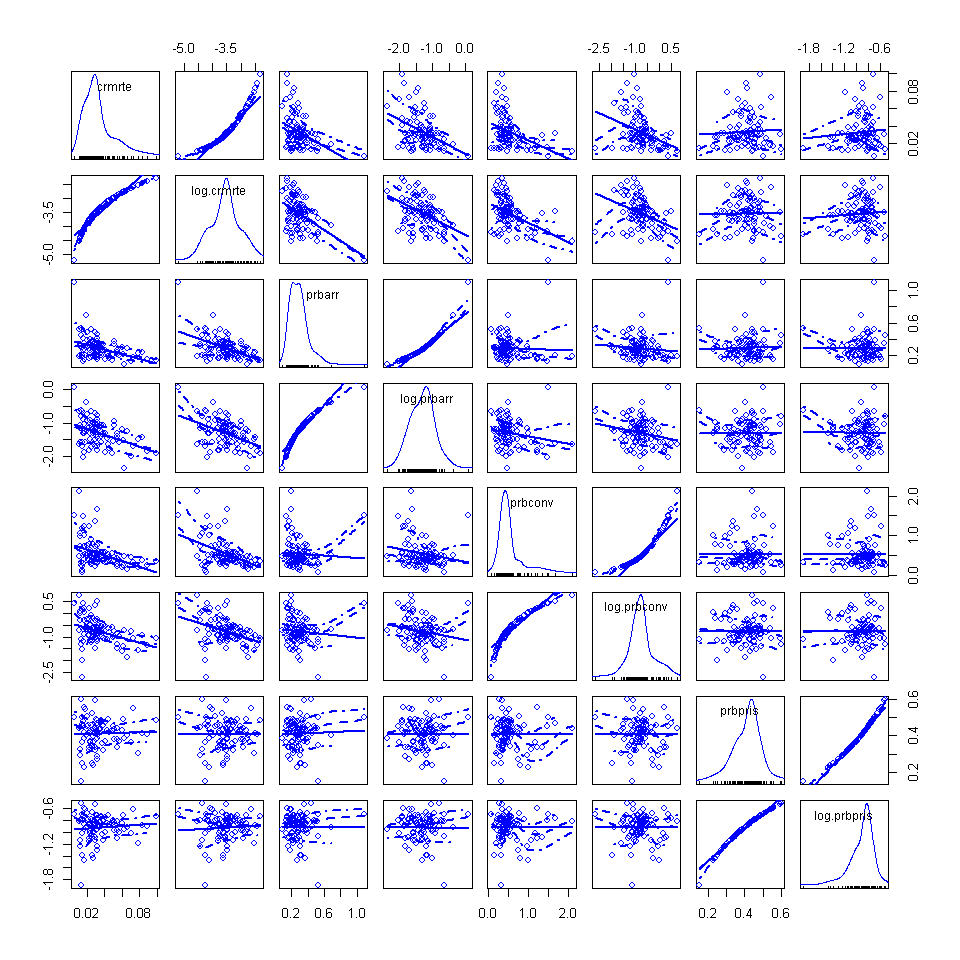

In [67]:
paste("Scatterplot matrix of variables of interest and Crime rate")
options(repr.plot.width=8, repr.plot.height=8)
scatterplotMatrix(clean[, vars.interest])

A correlation analysis shows that indeed probability of arrest and probability of conviction (both in their original and log-transformed forms) are negatively correlated with both crime rate and its logarithmic transformation, and also confirms that there is no correlation between these two variables and probability of prison and average sentence.

For all variables of interest (probability of arrest, probability of conviction and probability of arrest) the linear relationship measured by the correlation coefficient is higher when `crime rate` is log-transformed. Therefore, we should test both forms of this variable when building our model taking this into account (but also how the two forms of this variable affect the interpretability of results and how they affect the model assumptions.

The log form of our variables of interest does not change the correlation between them and `crime rate` heavily. However, it is still important to consider this transformation when defininig our population model because they could improve the model's interpretabilitya and assumptions.

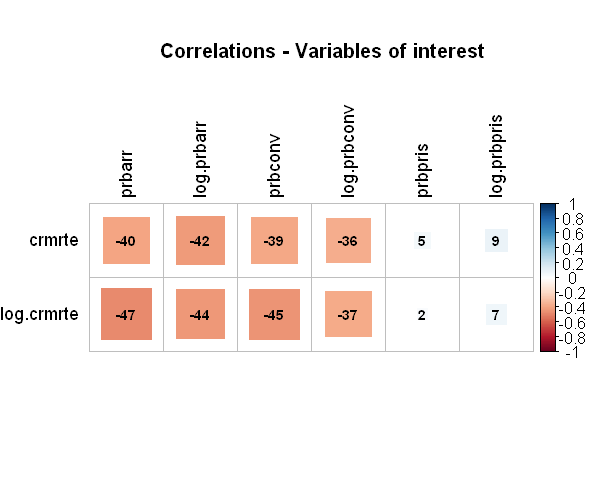

In [66]:
# Compute correlations
crime.corrs <- cor(select(clean, vars.interest))[1:2, 3:8]
# crime.corrs <- cor(select(clean, vars.interest))

# Plot correlations
options(repr.plot.width=5, repr.plot.height=4)
corrplot(crime.corrs, method = 'square',  order = 'original', diag = T, addCoef.col = T,
         tl.col = 'black', tl.cex = 0.9, addCoefasPercent = T, number.cex = 0.7)
title("Correlations - Variables of interest", cex.main = 1)

#### Control variables

Regarding possible control values, our main interest is to find variables that either confound the effect of our variables of interest on `crime rate` or that can increase the model's fit, reducing the variance of the model's error and of the coefficients of interest. 

To find which variables can be used as controls in our model, we did an initial exploratory analysis using a scatterplot matrix to find which of the candidate variables seemed to be related with `crime rate` or its logarithmic transformation. Upon inspecting the scatterplot matrix, we found that log of police per capita, tax per capita and density seem to have a relationship with `crime rate` and its logarithmic transformations. We will proceed to validate this using correlation analysis.

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"

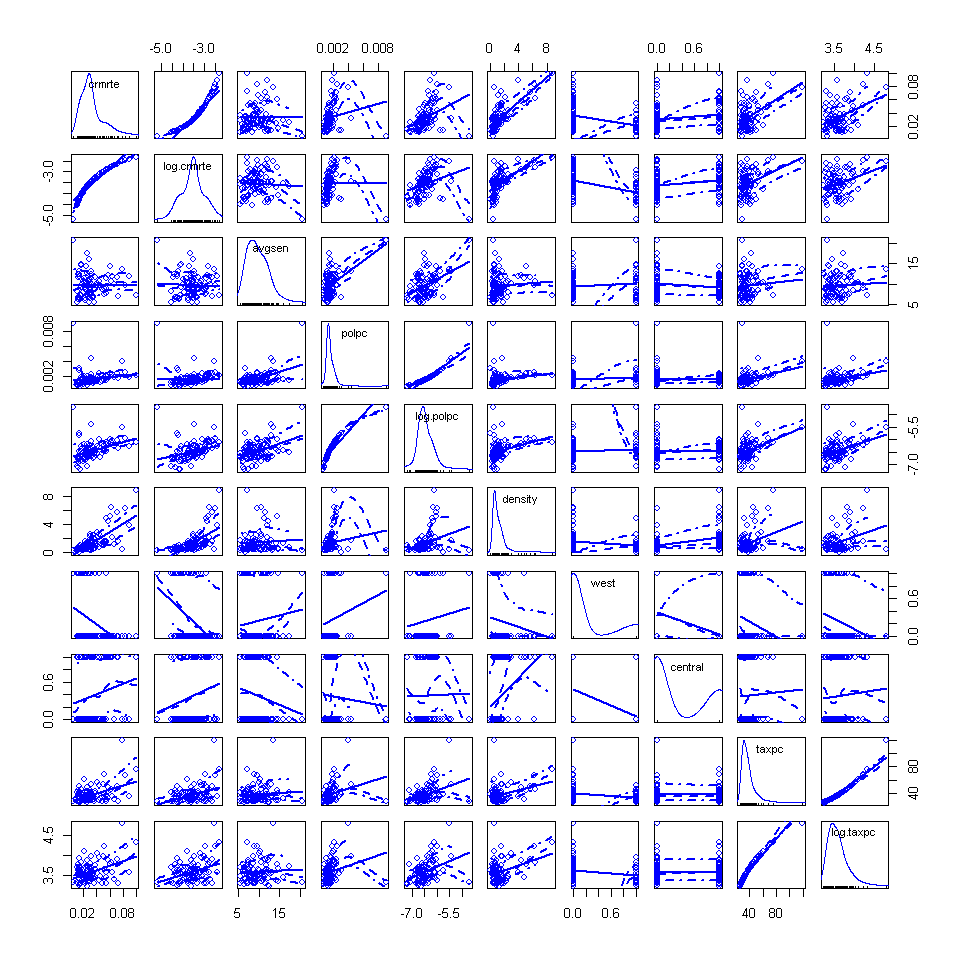

In [81]:
# Possible control variables
vars.control <- c('avgsen', 'polpc', 'log.polpc', 'density', 'west', 'central', 'taxpc', 'log.taxpc')

# Scatterplot matrix
options(repr.plot.width=8, repr.plot.height=8)
scatterplotMatrix(clean[, c('crmrte', 'log.crmrte', vars.control)])

The correlation matrix included below shows that `log.polpc`, `density`, `west` and `taxpc` are correlated with both `crime rate` and its logarithmic transformation and thus should be included in our estimated model, in order to immprove it's predictive power and reduce the variance of the estimated coefficients of our variables of interest. Furthermore, density is both correlated with `crime rate` and `log.prbarr`, which indicates that it may be a possible confounding variable and should also be included in our estimated model to reduce the bias of the estimator of the coefficient of `log.prbarr`.

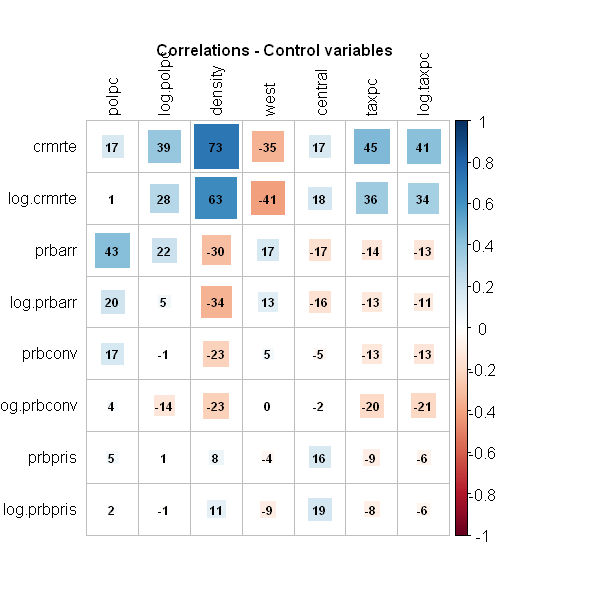

In [80]:
corrs.control <- cor(clean[, c(vars.interest, vars.control)], use = 'complete.obs')[1:8, 10:16]

options(repr.plot.width=5, repr.plot.height=5)
par(oma = c(0,0,0,4))
corrplot(corrs.control, method = 'square',  order = 'original', diag = T, addCoef.col = T,
         tl.col = 'black', tl.cex = 0.8, addCoefasPercent = T, number.cex = 0.6)
title("Correlations - Control variables", cex.main = 0.8)

In conclusion, the main recommendations provided by the exploratory data analysis, that need to be taken into account when specifying our regression model are the following:

- Both `crime rate` and its logarithmic transformation should be tested as possible dependent variables.


- `probability of arrest` and `probability of conviction`, our variables of interest, are correlated with both our candidate dependent variables and should be included in the regression model. Furthermore, their logarithmic transformation form is also correlated with the dependent variable and should be tested against their original form, using the resulting model's fit and meeting of the CLM asssumptions to decide which should be included in the specification of model 2.


- `log.polpc`, `density`, `west` and `taxpc` seem to have the strongest relationship with `crime rate` and its logarithmic form and should be included in the model specification as controls. It is specially important to include `density` since it is likely controlling for confounding effects.


- `probability of prison` does not seem to have an important relationship with `crime rate`. However, this is a result that is relevant to the campaign's research question; thus, it should be included in the regression, in order to show this variable's statistical and practical significance and the implications of this result to the political campaign.

# Bibliography